In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
import sklearn.discriminant_analysis
import itertools
%matplotlib inline

Utilizando los datos de Default construya una curva  de precision-recall con los resultados del modelo regresión logística 
(http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html). 
Escriba su propia función. No utilice la de sklearn.

/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0, 1)

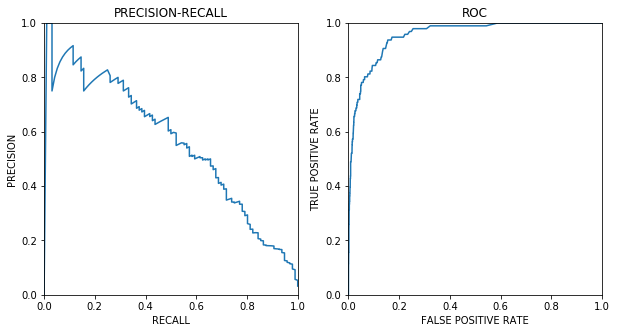

In [2]:
#Se cargan los datos. Valor a predecir : default (variable binaria)
url="https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv"
data=pd.read_csv(url)
#Se predice a partir de : balance
Y = data['default']
X = data[['balance']]
# Se inicia Logistic Regression de sklearn
f = sklearn.linear_model.LogisticRegression()

# Se separa el grupo de train del de test (0.7 train, 0.3 test)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.3)

# Se ajusta el modelo a partir de train
f.fit(X_train, Y_train)

# Se predice default para el balance del grupo de prueba
predict = f.predict(X_test)

# Probabilidad de que default sea 'Yes'
proba_yes = f.predict_proba(X_test)[:,1]

# Se asignan n_p valores entre 0 y 0.99
# Se planea encontrar el numero de falsos positivos y negativos, y verdaderos positivos y negativos
# clasificando como 'si' a los eventos con probabilidad superior a la de threshold
n_p = 1000
error_rate = np.zeros(n_p)
precision = np.zeros(n_p)
recall = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

# Se adjuntan a las listas de verdadero positivo y falso positivo para el barrido de la lista de threshold
for i in range(n_p):
    # Si p>p_threshold, se asigna 'Yes', de lo contrario, 'NO'
    ii = proba_yes>threshold[i]
    predict[ii] = 'Yes'
    predict[~ii] = 'No'
    # Conteo de verdaderos positivos y negativos y falsos positivos y negativos
    true_positive = (Y_test == 'Yes') & (predict == 'Yes') 
    false_positive = (Y_test == 'No') & (predict == 'Yes')
    false_negative = (Y_test == 'Yes') & (predict == 'No')
    true_negative = (Y_test == 'No') & (predict == 'No')
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    # Se adjuntan los valores de precision, recall y rata de falsos positivos a las listas
    if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

        
# Se grafica la curva de precision recall
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(recall, precision)
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
plt.xlim([0,1])
plt.ylim([0,1])

# Se grafica la cueva de ROC
plt.subplot(1,2,2)
plt.plot(fp_rate, tp_rate)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC')
plt.xlim([0,1])
plt.ylim([0,1])


b) 
Utilizando el siguiente dataset

https://vincentarelbundock.github.io/Rdatasets/doc/MASS/Boston.html 
https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv

encuentre los mejores predictores para saber si un suburbio tiene una rata de crimen mayor o menor a la media. 
Utilice LDA y regresion logistica junto a curvas ROC y Precision-Recall para justificar su respuesta.

In [3]:
#Funcion que devuelve resumen de ajuste para predictores del modelo
def summary_fit(X, Y, f_method, plot=True):
    # Se separa el grupo de train del de test
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.4)

    # Se ajusta el modelo a partir de train
    f_method.fit(X_train, Y_train)

    # Se predice ea partir de test
    predict = f_method.predict(X_test)

    # Probabilidad de la clase '+'
    proba_yes = f_method.predict_proba(X_test)[:,1]

    # Se asignan n_p valores entre 0 y 0.99
    # Se planea encontrar el numero de falsos positivos y negativos, y verdaderos positivos y negativos
    # clasificando como 'si' a los eventos con probabilidad superior a la de threshold
    n_p = 100
    error_rate = np.zeros(n_p)
    precision = np.zeros(n_p)
    recall = np.zeros(n_p)
    tp_rate = np.zeros(n_p)
    fp_rate = np.zeros(n_p)
    threshold = np.linspace(0,0.99, n_p)

    # Se adjuntan a las listas de verdadero positivo y falso positivo para el barrido de la lista de threshold
    for i in range(n_p):
        ii = proba_yes>threshold[i]
        predict[ii] = 'Yes'
        predict[~ii] = 'No'
        true_positive = (Y_test == 'Yes') & (predict == 'Yes') 
        false_positive = (Y_test == 'No') & (predict == 'Yes')
        false_negative = (Y_test == 'Yes') & (predict == 'No')
        true_negative = (Y_test == 'No') & (predict == 'No')
        n_tp = np.count_nonzero(true_positive)
        n_fp= np.count_nonzero(false_positive)
        n_fn = np.count_nonzero(false_negative)
        n_tn = np.count_nonzero(true_negative)
        if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
        if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
        if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

    # Area bajo la curva de Precision Recall
    ii = np.argsort(recall)
    pr_area = scipy.integrate.trapz(precision[ii], recall[ii])
    
    # Area bajo la curva de ROC
    ii = np.argsort(fp_rate)
    roc_area = scipy.integrate.trapz(tp_rate[ii], fp_rate[ii])
            
    # Calculo de F1
    F1 = np.max(2.0*precision*recall/(precision+recall+1E-12))
    if plot:
        l = 'Predictors:'
        for k in X.keys(): 
            l=l+' '+k
        
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(recall, precision)
        plt.xlabel('RECALL')
        plt.ylabel('PRECISION')
        plt.title('PRECISION-RECALL, AREA={:.2f}'.format(pr_area))
        plt.xlim([0,1])
        plt.ylim([0,1])

        plt.subplot(1,2,2)
        plt.plot(fp_rate, tp_rate, label=l)
        plt.xlabel('FALSE POSITIVE RATE')
        plt.ylabel('TRUE POSITIVE RATE')
        plt.title('ROC, AREA={:.2f}'.format(roc_area))
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.legend()
    return {'pr_area':pr_area, 'roc_area':roc_area, 'F1':F1}

In [4]:
#Funcion para encontrar mejores predictores

def find_best_predictors(X, Y, all_predictors, f_method):
    best = {'pr_area':0.0, 'roc_area':0.0, 'F1':0.0, 'predictors':''}

    # Barrido sobre todos los predictores
    for n_predictors in range(1,len(all_predictors)+1):
    
        # Todas las combinaciones de predictores de longitud n_predictors
        combinations = itertools.combinations(all_predictors, n_predictors)
        for c in combinations:
            predictors = list(c)
            X_in = X[predictors]

            # para n_predictors = 1
            if(n_predictors==1): 
                print('Trying these predictors', predictors)
                areas = summary_fit(X_in, Y, f, plot=False)
            else:
                intersection = list(set(best['predictors']) & set(predictors))
                # Solo se usan los predictores que se encuentran en la lista de mejores predictores
                if len(intersection)==len(best['predictors']):
                    print('Trying these predictors', predictors)
                    areas = summary_fit(X_in, Y, f, plot=False)
                    
            # Se actualiza si se mejora el F1 score, el area bajo la curva precision recall y ROC
            if areas['pr_area']>best['pr_area'] and areas['roc_area']>best['roc_area'] and areas['F1'] > best['F1']:
                best['pr_area'] = areas['pr_area']
                best['roc_area'] = areas['roc_area']
                best['F1'] = areas['F1']
                best['predictors'] = predictors
                print('\t\t UPDATED BEST RESULTS: {}'.format(best))
    #Devuelve los mejores indicadores
    return best

In [5]:
# Lectura de archivo
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Auto.csv')
print(data.keys())

mpgbinary = np.repeat('Yes', len(data))
ii = np.array(data['mpg']>np.mean(data['mpg']))
mpgbinary[ii] = 'Yes'
mpgbinary[~ii] = 'No'
data['mpgbinary'] = mpgbinary

# Se seleccionan los predictores que seran probados
all_predictors = ['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'year']

# Se define X y Y
X = data[all_predictors]
Y = data['mpgbinary']

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin', 'name'],
      dtype='object')


In [6]:
# Se aplican las funciones desarrolladas anteriormente para determinar los mejores indicadores con regresion logistica
f = sklearn.linear_model.LogisticRegression()
best = find_best_predictors(X, Y, all_predictors, f)
print(' ')
print('The best {}'.format(best))
print(' ')

Trying these predictors ['cylinders']
		 UPDATED BEST RESULTS: {'pr_area': 0.4477779643962178, 'roc_area': 0.9072224041925975, 'F1': 0.8799999999995013, 'predictors': ['cylinders']}
Trying these predictors ['displacement']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['horsepower']
Trying these predictors ['weight']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


		 UPDATED BEST RESULTS: {'pr_area': 0.9475108832593198, 'roc_area': 0.957180071637903, 'F1': 0.9078947368416056, 'predictors': ['weight']}
Trying these predictors ['acceleration']
Trying these predictors ['year']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'weight']
Trying these predictors ['displacement', 'weight']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['horsepower', 'weight']
Trying these predictors ['weight', 'acceleration']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['weight', 'year']
Trying these predictors ['cylinders', 'displacement', 'weight']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'horsepower', 'weight']
Trying these predictors ['cylinders', 'weight', 'acceleration']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'weight', 'year']
Trying these predictors ['displacement', 'horsepower', 'weight']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['displacement', 'weight', 'acceleration']
Trying these predictors ['displacement', 'weight', 'year']
Trying these predictors ['horsepower', 'weight', 'acceleration']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['horsepower', 'weight', 'year']
Trying these predictors ['weight', 'acceleration', 'year']
Trying these predictors ['cylinders', 'displacement', 'horsepower', 'weight']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'displacement', 'weight', 'acceleration']
Trying these predictors ['cylinders', 'displacement', 'weight', 'year']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'horsepower', 'weight', 'acceleration']
Trying these predictors ['cylinders', 'horsepower', 'weight', 'year']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'weight', 'acceleration', 'year']
Trying these predictors ['displacement', 'horsepower', 'weight', 'acceleration']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['displacement', 'horsepower', 'weight', 'year']
Trying these predictors ['displacement', 'weight', 'acceleration', 'year']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['horsepower', 'weight', 'acceleration', 'year']
Trying these predictors ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trying these predictors ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
Trying these predictors ['cylinders', 'displacement', 'weight', 'acceleration', 'year']


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


		 UPDATED BEST RESULTS: {'pr_area': 0.9566419528736076, 'roc_area': 0.9788011695906432, 'F1': 0.9341317365264464, 'predictors': ['cylinders', 'displacement', 'weight', 'acceleration', 'year']}
Trying these predictors ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
 
The best {'pr_area': 0.9566419528736076, 'roc_area': 0.9788011695906432, 'F1': 0.9341317365264464, 'predictors': ['cylinders', 'displacement', 'weight', 'acceleration', 'year']}
 


/home/nicomn97/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Despues de probar para Logistic Regression, se obtiene:

1 VEZ:
The best {'pr_area': 0.9574392496602167, 'roc_area': 0.9767612524461841, 'F1': 0.9387755102035816, 'predictors': ['horsepower', 'weight']}

2 VEZ:
The best {'pr_area': 0.9559706626232997, 'roc_area': 0.9814814814814814, 'F1': 0.9542483660125719, 'predictors': ['weight', 'year']}
 
3 VEZ:
The best {'pr_area': 0.9247968515019328, 'roc_area': 0.9417396949042518, 'F1': 0.9166666666661691, 'predictors': ['cylinders', 'displacement']}

In [7]:
# Se aplican las funciones desarrolladas anteriormente para determinar los mejores indicadores con LDA
f = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
best = find_best_predictors(X, Y, all_predictors, f)
print(' ')
print('The best {}'.format(best))
print(' ')

Trying these predictors ['cylinders']
		 UPDATED BEST RESULTS: {'pr_area': 0.4473474666014989, 'roc_area': 0.8998376623376623, 'F1': 0.8941176470583252, 'predictors': ['cylinders']}
Trying these predictors ['displacement']
		 UPDATED BEST RESULTS: {'pr_area': 0.8891091535221114, 'roc_area': 0.9299868981329839, 'F1': 0.9148936170207801, 'predictors': ['displacement']}
Trying these predictors ['horsepower']
Trying these predictors ['weight']
Trying these predictors ['acceleration']
Trying these predictors ['year']
Trying these predictors ['cylinders', 'displacement']
Trying these predictors ['displacement', 'horsepower']
Trying these predictors ['displacement', 'weight']
Trying these predictors ['displacement', 'acceleration']
Trying these predictors ['displacement', 'year']
		 UPDATED BEST RESULTS: {'pr_area': 0.9391486890083682, 'roc_area': 0.9722222222222222, 'F1': 0.9171974522288027, 'predictors': ['displacement', 'year']}
Trying these predictors ['cylinders', 'displacement', 'year']

Despues de probar para LDA, se obtiene:

1 VEZ:
The best {'pr_area': 0.9663268074814666, 'roc_area': 0.9603252032520325, 'F1': 0.9350649350644353, 'predictors': ['cylinders', 'displacement', 'horsepower']}

2 VEZ:
The best {'pr_area': 0.8936449447520513, 'roc_area': 0.9452032520325203, 'F1': 0.904761904761405, 'predictors': ['cylinders', 'displacement', 'weight']}
 
3 VEZ:
The best {'pr_area': 0.9475002909072638, 'roc_area': 0.9544642857142858, 'F1': 0.9171974522287994, 'predictors': ['displacement', 'acceleration']}